In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

print("torch: {} \n numpy: {}".format(torch.__version__, np.__version__))
print("USE GPU? {}".format(torch.cuda.is_available()))

torch: 1.13.1+cpu 
 numpy: 1.22.3
USE GPU? False


# 텐서를 만드는 방법

In [3]:
# 리스트로부터 2*3 텐서 생성 
x_list = [[1,2,3], [4,5,6]]
x = torch.Tensor(x_list)
print(x)

# numpy array 로부터 2*3 텐서 생성
x_numpy = np.array([[1,2,3], [4,5,6]])
x = torch.Tensor(x_numpy)
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 다시 원래 자료형태로 복귀

In [4]:
x_back2list = x.tolist()
print(x_back2list)
print(type(x_back2list))

x_back2numpy = x.numpy()
print(x_back2numpy)
print(type(x_back2numpy))

print(x) # 해당 텐서 x는 그대로

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
<class 'list'>
[[1. 2. 3.]
 [4. 5. 6.]]
<class 'numpy.ndarray'>
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## GPU 사용하기

In [8]:
# 기본 device 정보 
print(x.device)  # cpu

device = 'cpu'
x = x.to(device)
print(x.device)
print(x)

cpu
cpu
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 랜덤 텐서 생성

In [10]:
# 랜덤 숫자로 구성된 크기가 2*3인 텐서 생성
# 0과 1사이의 랜덤한 숫자
print(torch.rand(2,3))

# 0과 8 사이의 정수형 랜덤한 숫자
print(torch.randint(low=0, high=8, size=(2,3)))

tensor([[0.9326, 0.0010, 0.7684],
        [0.8439, 0.3207, 0.7850]])
tensor([[3, 6, 3],
        [4, 7, 5]])


## 0으로 채워진 텐서 

In [14]:
# zeros_like() : 해당 함수 크기, 자료형, GPU 정보까지 복사
x_zeros = torch.zeros_like(x.cpu())
print(x_zeros.device)
print(x_zeros)

print(torch.ones((2,3)))

cpu
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


# 텐서의 타입

In [15]:
# 실수형 텐서 
a = torch.FloatTensor(np.array([[1,2,3], [4,5,6]]))
print(a.type())
print(a)

# 정수형 텐서
b = torch.LongTensor(np.array([[1,2,3], [4,5,6]]))
print(b.type())
print(b)

# 8 bit 정수형
c = torch.ByteTensor([True, False, True, True])
print(c.type())
print(c)

torch.FloatTensor
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.ByteTensor
tensor([1, 0, 1, 1], dtype=torch.uint8)


# 텐서 조작

## 슬라이싱

In [20]:
torch.manual_seed(777)
x = torch.randint(0, 10, size=(2,3,4))
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


In [18]:
print(x[0,2,3])

tensor(7)


In [21]:
print(x[0,:2,3])

tensor([8, 7])


In [22]:
print(x[0,2,1:])

tensor([4, 1, 7])


In [23]:
print(x[0,2,1:2])

tensor([4])


In [24]:
print(x[0,2,:])

tensor([3, 4, 1, 7])


## 선택 텐서 시각화

In [25]:
def draw_tensor(temp):
    fig, axes = plt.subplots(len(temp), 1)
    for i in range(len(temp)):
        axes[i].matshow(temp.numpy()[i], vmin=0, vmax=1, cmap='gray')
    plt.show()

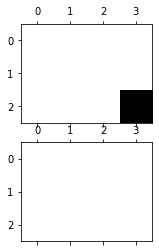

In [26]:
temp = torch.ones_like(x)
temp[0,2,3] = 0
draw_tensor(temp)

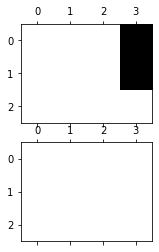

In [27]:
temp = torch.ones_like(x)
temp[0, :2, 3] = 0
draw_tensor(temp)

## view

In [28]:
print(x.view(2,2,6))
print(x.view(-1,1,12))

tensor([[[5, 9, 1, 8, 5, 7],
         [7, 7, 3, 4, 1, 7]],

        [[2, 0, 6, 3, 2, 3],
         [0, 0, 9, 5, 4, 2]]])
tensor([[[5, 9, 1, 8, 5, 7, 7, 7, 3, 4, 1, 7]],

        [[2, 0, 6, 3, 2, 3, 0, 0, 9, 5, 4, 2]]])


## transpose

In [29]:
x_transposed = x.transpose(0,1)
print(x_transposed.size())
print(x_transposed)

torch.Size([3, 2, 4])
tensor([[[5, 9, 1, 8],
         [2, 0, 6, 3]],

        [[5, 7, 7, 7],
         [2, 3, 0, 0]],

        [[3, 4, 1, 7],
         [9, 5, 4, 2]]])


In [32]:
# 2차원에서는 전치행렬 생성 가능 --> .t()
A = torch.Tensor([[1,2,3],
                 [4,5,6]])
print(A)
print(A.size())  # [2,3]
print(A.t())
print(A.t().size())  # [3,2]
print(A)  # 원본을 바꾸진 않음
print(A.size())

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


# squeeze & unsqueeze

In [36]:
x = torch.rand((2,1,3,4,1))

print(x)

# 크기가 1인 차원 제거(squeeze)
print(x.squeeze())
print(x.squeeze().size())  # [2,3,4]

# 두번째 차원 squeeze
print(x.squeeze(1))
print(x.squeeze(1).size())  # [2,3,4,1]

# 4번째 차원에 크기 1 추가 --> 6차원 텐서
print(x.unsqueeze(3))
print(x.unsqueeze(3).size())  # [2,1,3,1,4,1]

tensor([[[[[0.8897],
           [0.8886],
           [0.7226],
           [0.7461]],

          [[0.5039],
           [0.1899],
           [0.4138],
           [0.4453]],

          [[0.7574],
           [0.7359],
           [0.1175],
           [0.0064]]]],



        [[[[0.0768],
           [0.6158],
           [0.8972],
           [0.3932]],

          [[0.3034],
           [0.7841],
           [0.0913],
           [0.2953]],

          [[0.3486],
           [0.6468],
           [0.6712],
           [0.0438]]]]])
tensor([[[0.8897, 0.8886, 0.7226, 0.7461],
         [0.5039, 0.1899, 0.4138, 0.4453],
         [0.7574, 0.7359, 0.1175, 0.0064]],

        [[0.0768, 0.6158, 0.8972, 0.3932],
         [0.3034, 0.7841, 0.0913, 0.2953],
         [0.3486, 0.6468, 0.6712, 0.0438]]])
torch.Size([2, 3, 4])
tensor([[[[0.8897],
          [0.8886],
          [0.7226],
          [0.7461]],

         [[0.5039],
          [0.1899],
          [0.4138],
          [0.4453]],

         [[0.7574],
          

## cat & stack

In [37]:
def draw_tensor2(x):
    subplot_size = 1 if x.ndimension() <= 2 else x.size(0)
    fig, axes = plt.subplots(subplot_size, 1)
    
    if subplot_size == 1:
        axes.matshow(x.numpy(), vmin=0, vmax=1, cmap='gray')
        
    else:
        for i in range(subplot_size):
            axes[i].matshow(x.numpy()[i], vmin=0, vmax=1, cmap='gray')
            
    plt.show()

tensor([[0.0819, 0.4911, 0.4033],
        [0.3859, 0.8813, 0.8811],
        [0.7242, 0.5033, 0.8249],
        [0.2634, 0.3112, 0.5948]])


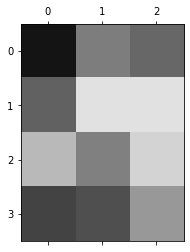

In [38]:
torch.manual_seed(777)

A = torch.rand((2,3))
B = torch.rand((2,3))

AB_cated = torch.cat([A,B], dim=0)
print(AB_cated)

draw_tensor2(AB_cated)

tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])
torch.Size([2, 2, 3])


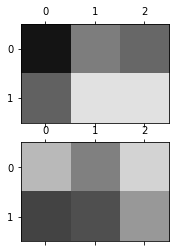

None
tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])
torch.Size([2, 2, 3])


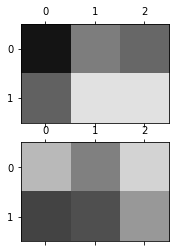

In [44]:
AB_stacked = torch.stack([A,B], dim=0)
print(AB_stacked)
print(AB_stacked.size()) # [2,2,3]
print(draw_tensor2(AB_stacked))

# 각 텐서를 첫번째 차원 기준으로 unsqueeze 한 후, cat한것과 같은 결과
AB_unsqueeze_cat = torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)
print(AB_unsqueeze_cat)
print(AB_unsqueeze_cat.size()) # [2,2,3]
draw_tensor2(AB_unsqueeze_cat)


tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]]])
torch.Size([1, 2, 3])
tensor([[[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])
torch.Size([1, 2, 3])


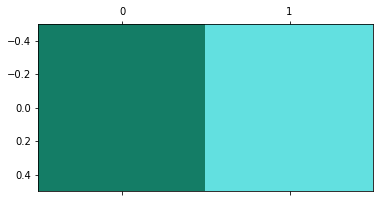

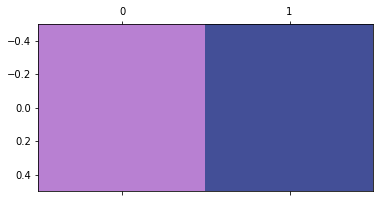

In [49]:
print(A.unsqueeze(0))
print(A.unsqueeze(0).size())

print(B.unsqueeze(0))
print(B.unsqueeze(0).size())

draw_tensor2(A.unsqueeze(0))
draw_tensor2(B.unsqueeze(0))

# 텐서의 사칙연산

## 텐서의 덧셈과 뺄셈

In [52]:
x = torch.Tensor([1,2,3])
y = torch.Tensor([4,5,6])

print(torch.add(x,y))
print(x+y)

print(torch.sub(x,y))
print(x-y)

print(x+1)

print(x-1)

tensor([5., 7., 9.])
tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([-3., -3., -3.])
tensor([2., 3., 4.])
tensor([0., 1., 2.])


## 텐서의 곱셈

In [51]:
# 원소 단위 곱
# 스칼라(scalar)끼리의 곱
# 아르마다 곱(Hadamard product)

print(x*y)
print(torch.mul(x,y))

print(x/y)
print(torch.div(x,y))

tensor([ 4., 10., 18.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])
tensor([0.2500, 0.4000, 0.5000])


In [53]:
# 벡터의 곱셈
# 스칼라곱 or 점곱(dot product)
# 내적 (inner product)

print("inner product: ")
print(torch.dot(x,y))  # tensor(32.)
print(x.dot(y))        # tensor(32.)

inner product: 
tensor(32.)
tensor(32.)


In [54]:
# 행렬의 곱셈
# torch.mm (matrix multiplication)

x = torch.Tensor([[1,4],
                 [2,5],
                 [3,6]])
y = torch.Tensor([[7,9],
                 [8,10]])

print(torch.mm(x,y))
print(x.mm(y))

tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])
tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])


# 기타 연산

## sum / mean

In [55]:
z = torch.Tensor([[[1,2],
                  [3,4]],
                 
                  [[5,6],
                  [7,8]]])

print(torch.sum(z))
print(torch.mean(z))

print(torch.sum(z, dim=0))
print(torch.mean(z, dim=0))

tensor(36.)
tensor(4.5000)
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[3., 4.],
        [5., 6.]])


In [58]:
print(torch.max(z))
print(torch.argmax(z)) # 최댓값의 위치
                       # tensor(7)

print(torch.min(z))
print(torch.argmin(z)) # 최댓값의 위치
                       # tensor(0)

# 튜플 반환
print(torch.max(z, dim=0))
print(torch.min(z, dim=0))

tensor(8.)
tensor(7)
tensor(1.)
tensor(0)
torch.return_types.max(
values=tensor([[5., 6.],
        [7., 8.]]),
indices=tensor([[1, 1],
        [1, 1]]))
torch.return_types.min(
values=tensor([[1., 2.],
        [3., 4.]]),
indices=tensor([[0, 0],
        [0, 0]]))


## 논리연산

In [59]:
z = torch.Tensor([-3,2,0])

print(z.eq(0))
print(z == 0)  # tensor([False, False,  True])

# .ge() : greater or equal to
print(z.ge(0))
print(z >= 0)  # tensor([False,  True,  True])

# .gt() : greater than
print(z.gt(0))
print(z > 0)  # tensor([False,  True, False])

# .le() : less or equal to
print(z.le(0))
print(z <= 0)  # tensor([ True, False,  True])

# .lt() : less than
print(z.lt(0))
print(z < 0)  # tensor([ True, False, False])

# torch.ByteTensor 타입 반환

tensor([False, False,  True])
tensor([False, False,  True])
tensor([False,  True,  True])
tensor([False,  True,  True])
tensor([False,  True, False])
tensor([False,  True, False])
tensor([ True, False,  True])
tensor([ True, False,  True])
tensor([ True, False, False])
tensor([ True, False, False])
